## Average Directional Movement Index

Average Directional Movement Index (ADX)는 웰스 와일더(Welles Wilder)에 의해 개발된 기술적 분석 도구로, 시장의 추세 강도를 측정하는 데 사용된다. ADX는 방향성 지표(Directional Movement Indicators, DMI)의 일부로, 시장의 추세가 얼마나 강력한지를 수치적으로 나타내며, 추세의 존재 여부뿐만 아니라 그 강도까지 판단할 수 있도록 돕는다.

ADX는 주로 세 가지 선으로 구성된다

1. **+DI (Positive Directional Indicator)**: 주가가 상승하는 날의 움직임을 측정하며, 상승 추세의 강도를 나타낸다
2. **-DI (Negative Directional Indicator)**: 주가가 하락하는 날의 움직임을 측정하며, 하락 추세의 강도를 나타낸다
3. **ADX (Average Directional Movement Index)**: +DI와 -DI의 차이를 평활화하여 추세의 전반적인 강도를 나타낸다

### 계산 방법

1. 방향성 움직임의 계산 : **+DM (Positive Directional Movement)** 와 **-DM (Negative Directional Movement)** 를 계산한다. 이는 각각 당일 고가가 전일 고가보다 높을 때, 그리고 당일 저가가 전일 저가보다 낮을 때의 차이를 사용한다.

$$\mathrm{DM}^+ = \max(\text{High}_{t} - \text{High}_{t-1}, 0)$$
$$
\mathrm{DM}^- = \max(\text{Low}_{t-1} - \text{Low}_{t}, 0)
$$

2. 방향성 지표 계산 (DI) : +DI와 -DI는 각각 +DM과 -DM을 일정 기간 동안의 평균 **True Range (ATR)** 로 나눈 후 100을 곱하여 백분율로 표현한다

$$\mathrm{DI}^+ = \left(\frac{\mathrm{DM}^+}{\text{ATR}}\right) \times 100$$
$$\mathrm{DI}^- = \left(\frac{\mathrm{DM}^-}{\text{ATR}}\right) \times 100$$

3. ADX 계산 : ADX는 +DI와 -DI의 절대 차이를 평균 True Range로 나눈 값의 이동 평균을 사용하여 계산된다. 이 값은 일반적으로 14일 기간을 사용하여 평활화된다

$$\text{DX} = \left(\frac{|\mathrm{DI}^+ - \mathrm{DI}^-|}{\mathrm{DI}^+ + \mathrm{DI}^-}\right) \times 100$$
$$\text{ADX} = \text{EMA}_{14}(\text{DX})$$

### ADX의 해석

- ADX 값이 25 이상일 때, 시장은 강력한 추세를 보이는 것으로 간주된다. 높은 ADX 값은 추세가 강하다는 것을 나타내며, 투자자는 추세 방향의 거래를 고려할 수 있다.
- ADX 값이 25 미만일 경우, 시장은 약한 추세 또는 횡보 상태일 가능성이 높다.
- $\mathrm{DM}^+$가 $\mathrm{DM}^-$보다 높을 때는 상승 추세를, $\mathrm{DM}^-$가 $\mathrm{DM}^+$보다 높을 때는 하락 추세를 나타낸다.

ADX는 추세의 방향을 나타내지 않고 오직 강도만을 측정한다는 점에서 독특하다. 따라서 ADX는 다른 추세 지표 또는 기술적 분석 도구와 함께 사용될 때 가장 효과적이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.trend import adx, adx_neg, adx_pos
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
adx_index = adx(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 14,
    fillna = False
)

<Axes: xlabel='Date'>

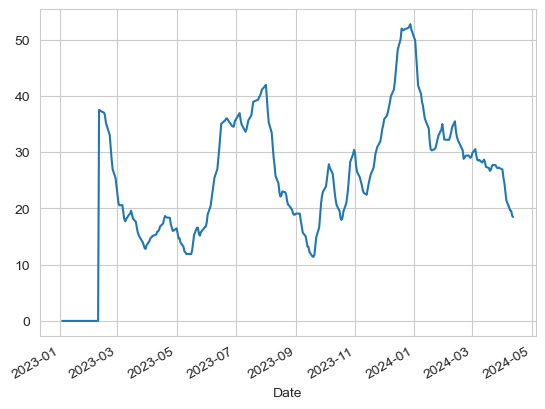

In [7]:
adx_index.plot()